## Наименование проекта

Исследование объявлений о продаже квартир

## Описание проекта

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

Цель проекта - определить рыночную стоимость объектов недвижимости. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

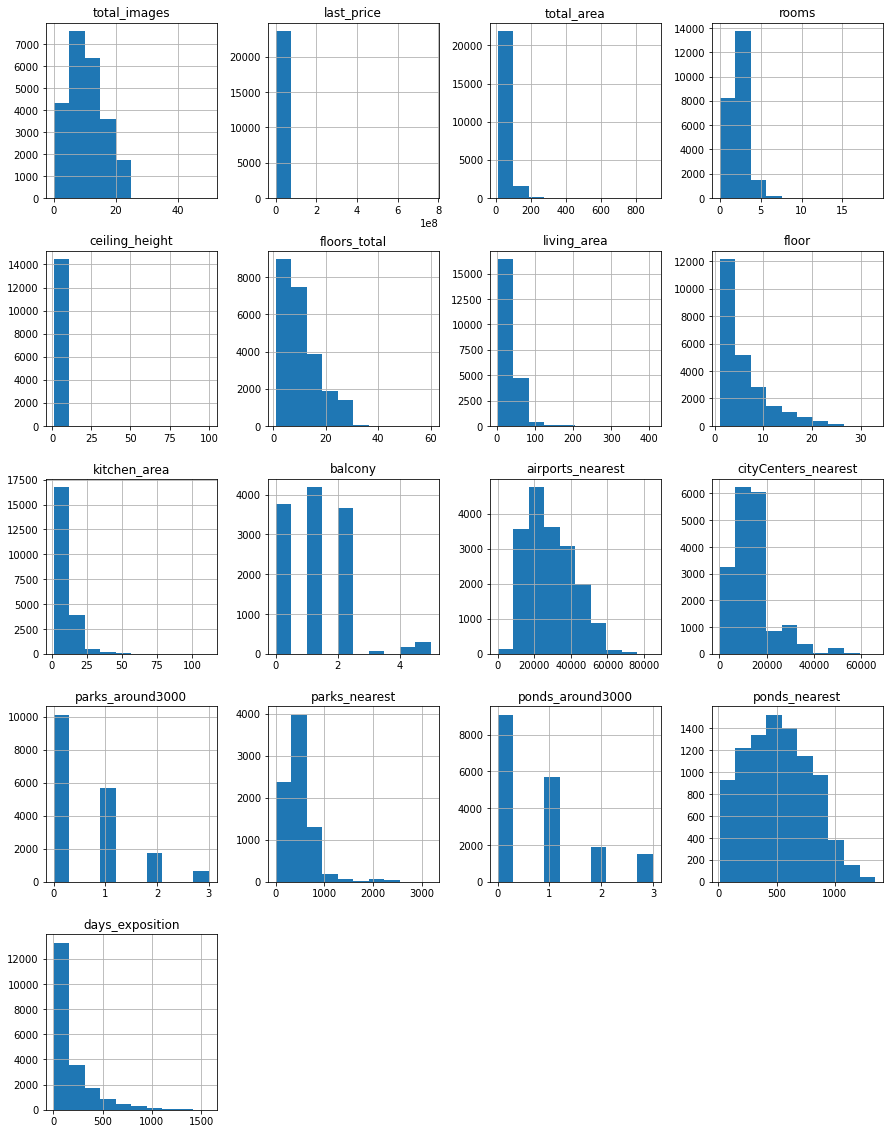

In [4]:
data.hist(figsize=(15, 20))

## Предобработка данных

In [5]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Удаление пропусков

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Причины пропусков и дальнейшие действия с ними:**

В 'floors_total', 'living_area', 'kitchen_area' пропуски заменим на среднее значение по столбцу (не на медианное, потому что в данных нет слишком больших или слишком малых значений). Пропуски могли появиться из-за того, что пользователь не указал эти данные.

В 'days_exposition', 'ceiling_height' пропуски заменим на медианное значение по столбцу (есть большой разброс значений). Пропуски могли появиться из-за технического сбоя при выгрузке данных.

В 'is_apartment' пропуски заменим на False, т.к. скорее всего квартира не является апартаментами. Пропуски могли появиться из-за того, что пользователь мог не указать эти данные.

В 'balcony' пропуски заменим на 0, т.к. скорее всего в квартире нет балконов. Пропуски могли появиться из-за того, что пользователь мог не указать эти данные.

В 'locality_name' пропуски заменим на 'unknown'. Пропуски могли появиться из-за сбоя в автоматизированной системе сбора информации.

В остальных столбцах пропуски оставим: таких значений много и их невозможно заменить или удалить. Пропуски могли появиться из-за сбоя в автоматизированной системе сбора информации.

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [8]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [9]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())

In [10]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [12]:
data['balcony'] = data['balcony'].fillna(0)

In [13]:
data['locality_name'] = data['locality_name'].fillna('unknown')

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Изменение типов данных

В 'floors_total', 'balcony' тип данных указан как 'float64'.

Эти столбцы необходимо перевести в int64, т.к. знаки после запятой в них совсем не логичны. Количество этажей и балконов всегда указываются в целом числе.

In [15]:
data['floors_total'] = data['floors_total'].astype('int')

In [16]:
data['balcony'] = data['balcony'].astype('int')

### Исследование неявных дубликатов

In [17]:
#pd.set_option('display.max_rows',None)

In [18]:
data['locality_name'].sort_values(ascending=False).unique()

array(['село Шум', 'село Старая Ладога', 'село Русско-Высоцкое',
       'село Рождествено', 'село Путилово', 'село Паша', 'село Павлово',
       'село Никольское', 'село Копорье', 'садовое товарищество Садко',
       'садовое товарищество Рахья', 'садовое товарищество Приладожский',
       'садовое товарищество Новая Ропша',
       'садоводческое некоммерческое товарищество Лесная Поляна',
       'посёлок станции Свирь', 'посёлок станции Громово',
       'посёлок при железнодорожной станции Приветнинское',
       'посёлок при железнодорожной станции Вещево',
       'посёлок городского типа имени Свердлова',
       'посёлок городского типа имени Морозова',
       'посёлок городского типа Форносово',
       'посёлок городского типа Ульяновка',
       'посёлок городского типа Токсово', 'посёлок городского типа Тайцы',
       'посёлок городского типа Сиверский',
       'посёлок городского типа Рябово', 'посёлок городского типа Рощино',
       'посёлок городского типа Павлово', 'посёлок гор

In [19]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [20]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [21]:
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок станции')

In [22]:
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')

In [23]:
data['locality_name'].sort_values(ascending=False).unique()

array(['село Шум', 'село Старая Ладога', 'село Русско-Высоцкое',
       'село Рождествено', 'село Путилово', 'село Паша', 'село Павлово',
       'село Никольское', 'село Копорье', 'садовое товарищество Садко',
       'садовое товарищество Рахья', 'садовое товарищество Приладожский',
       'садовое товарищество Новая Ропша',
       'садовое товарищество Лесная Поляна', 'поселок станции Свирь',
       'поселок станции Приветнинское', 'поселок станции Лужайка',
       'поселок станции Корнево', 'поселок станции Громово',
       'поселок станции Вещево',
       'поселок городского типа имени Свердлова',
       'поселок городского типа имени Морозова',
       'поселок городского типа Янино-1',
       'поселок городского типа Форносово',
       'поселок городского типа Федоровское',
       'поселок городского типа Ульяновка',
       'поселок городского типа Токсово', 'поселок городского типа Тайцы',
       'поселок городского типа Советский',
       'поселок городского типа Синявино',
     

### Добавление новых столбцов

**Столбец 'price_1m' - цена одного квадратного метра**

In [24]:
data['price_1m'] = data['last_price']/data['total_area']

In [25]:
#округлим значение до двух знаков после запятой и выведем на экран
round(data['price_1m'], 2).head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_1m, dtype: float64

**Столбец 'weekday' - день недели**

In [26]:
data['data_datetime'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [27]:
data['weekday'] = data['data_datetime'].dt.weekday

In [28]:
data['weekday'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

**Столбец 'month' - месяц**

In [29]:
data['month'] = data['data_datetime'].dt.month

In [30]:
data['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

**Столбец 'year' - год**

In [31]:
data['year'] = data['data_datetime'].dt.year

In [32]:
data['year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

**Столбец 'floor_type' - тип этажа**

In [33]:
def floor_type (floor):
    if floor['floor'] == 1:
        return 'first'
    if floor['floor'] == floor['floors_total']:
        return 'last'
    else:
        return 'other'

In [34]:
data['floor_type'] = data.apply(floor_type,axis=1)

In [35]:
data['floor_type'].head()

0    other
1    first
2    other
3    other
4    other
Name: floor_type, dtype: object

**Столбец 'citycenters_nearest_km' - расстояние в км**

In [36]:
data['citycenters_nearest_km'] = data['cityCenters_nearest']/1000

In [37]:
round(data['citycenters_nearest_km'], 1).head()

0    16.0
1    18.6
2    13.9
3     6.8
4     8.1
Name: citycenters_nearest_km, dtype: float64

## Исследовательский анализ данных

**Изучим отдельные параметры и построим по ним гистограммы (и не только)**

<AxesSubplot:>

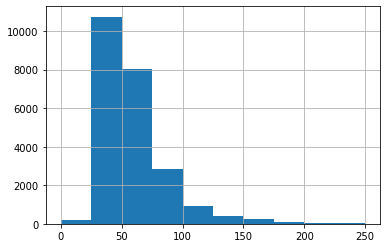

In [38]:
#строим гистограмму по столбцу 'общая площадь'
data['total_area'].hist(range=(0,250))

В основном общая площадь продаваемых квартир колеблется между 25 и 50 метрами. Чуть меньше квартиры продаются с метражом от 50 до 75 метров. Квартиры с 200-250 метрами общей площадью выставляются на продажу в наименьшем количестве.

<AxesSubplot:>

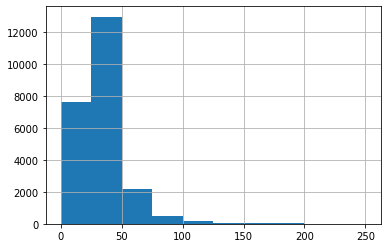

In [39]:
#строим гистограмму по столбцу 'жилая площадь'
data['living_area'].hist(range=(0,250))

В основном жилая площадь продаваемых квартир колеблется между 25 и 50 метрами. Наименее - квартиры с 150-200 метров.

<AxesSubplot:>

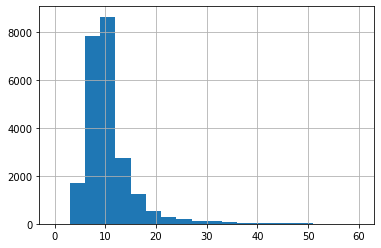

In [40]:
#строим гистограмму по столбцу 'площадь кухни'
data['kitchen_area'].hist(bins=20,range=(0,60))

Наиболее часто встречаемая площадь кухни составляет  6-12 метров. Больше 40 метров площадь кухни практически не встречается. В объявлениях нет квартир с общей площадью кухни равной 0 метров.

<AxesSubplot:>

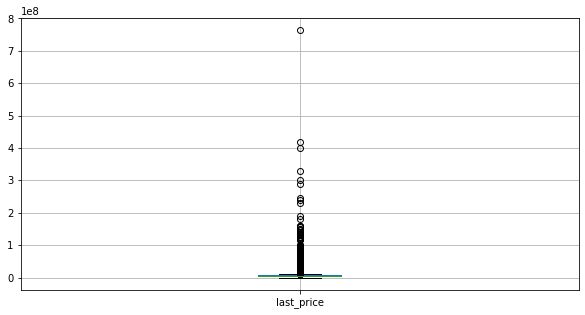

In [41]:
#строим диаграмму размаха по столбцу 'цена объекта'
data.boxplot('last_price',figsize=(10,5))

Большая часть значений цены объекта колеблется около 5 млн. руб. На графике видны выбросы со значениями 400 и даже 700 млн. руб.

<AxesSubplot:>

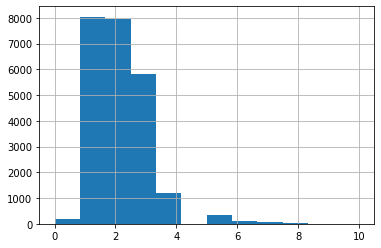

In [42]:
#строим гистограмму по столбцу 'кол-во комнат'
data['rooms'].hist(bins=12,range=(0,10))

В основном продаются квартиры с 1-3 комнатами. В наименьшем кол-ве проадются квартиры с 5-8 комнатами. Есть и квартиры совсем без комнат.

<AxesSubplot:>

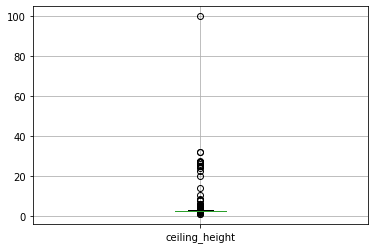

In [43]:
#строим диаграмму размаха по столбцу 'высота потолков'
data.boxplot('ceiling_height')

Самая часто встречаемая высота потолков - 3 метра. Мы также можем увидеть выбросы со значениями выше 20 и даже 100 метров.

In [44]:
#найдем выбросы путем группировки значений
data.groupby('ceiling_height')['last_price'].count()

ceiling_height
1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: last_price, Length: 183, dtype: int64

Предположим, что значения выше 20 метров - это вещественные значения 2,0 метров и т.д.

Заменим такие аномалии с помощью функции.

In [45]:
#создадим функцию для обработки аномальных значений
ceiling_height = [20.00,22.60,24.00,25.00,26.00,27.00,27.50,32.00,100.00]

def ceiling_height (height):
    if height == 20.00:
        return 2.00
    if height == 22.60:
        return 2.26
    if height == 24.00:
        return 2.40
    if height == 25.00:
        return 2.50
    if height == 26.00:
        return 2.60
    if height == 27.00:
        return 2.70
    if height == 27.50:
        return 2.75
    if height == 32.00:
        return 3.20
    if height == 100.00:
        return 10.00

<AxesSubplot:>

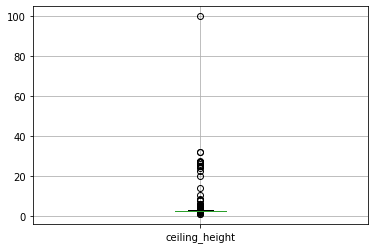

In [46]:
#строим диаграмму размаха по столбцу 'высота потолков' чтобы убедиться в замене аномальных значений
data.boxplot('ceiling_height')

Видим, что среднее значение высоты потолков равно примерно 3 метра.

<AxesSubplot:ylabel='floor_type'>

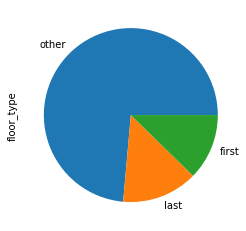

In [47]:
#строим круговую диаграмму по столбцу 'тип этажа квартиры'
data['floor_type'].value_counts().plot(kind='pie')

Квартир на первом и последнем этажах одинаковое кол-во на продажу. Преобладают квартиры, находящиеся между вторым и препоследним этажей.

<AxesSubplot:>

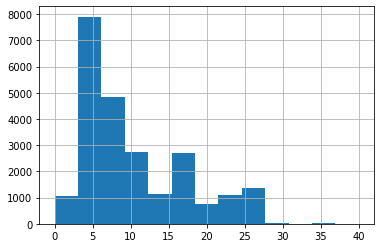

In [48]:
#строим гистограмму по столбцу 'кол-во этажей в доме'
data['floors_total'].hist(bins=13,range=(0,40))

Чаще всего квартиры продаются в 3-5 этажных домах. Максимальное кол-во этажей - 37.

<AxesSubplot:>

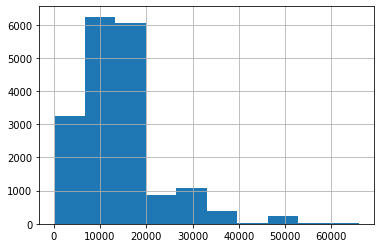

In [49]:
#строим гистограмму по столбцу 'расстояние до центра города в метрах'
data['cityCenters_nearest'].hist()

В основном продаваемые квартиры находятся в 8000-20000 м от центра города. Есть и квартиры, которые находятся в самом центре города. Также некоторые квартиры продаются на расстоянии от 60000 м от центра города.

<AxesSubplot:>

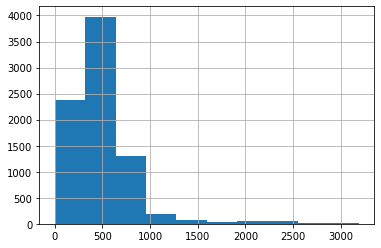

In [50]:
#строим гистограмму по столбцу 'расстояние до ближайшего парка в метрах'
data['parks_nearest'].hist()

У большинства продаваемых квартир парки находятся на расстоянии 300-600 метров. Квартиры, рядом с которыми нет парков, в меньшинстве.

**Изучим как быстро продавались квартиры**

<AxesSubplot:>

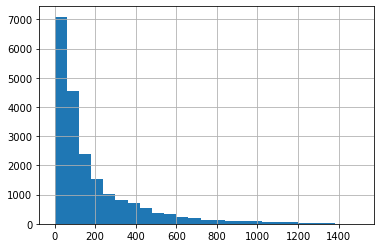

In [51]:
#строим гистограмму по столбцу 'сколько дней было размещено объявление'
data['days_exposition'].hist(bins=25,range=(0,1500))

In [52]:
#опишем гистограмму
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим, что в среднем объявления были размещены 170 дней с момента публикации до снятия. Медианное значение - 95 дней. Минимальное кол-во дней размещения объявления - 1 день, а самое большое - 1580 дней (4 года и 3 месяца).

Будем считать быстрые продажи такие, которые осуществились за 45 дней, а долгие - более 200 дней.

**Определим факторы, которые больше всего влияют на общую стоимость объекта**

**Зависит ли цена от общей площади?**

In [54]:
#создадим столбец, в котором переведем рубли в миллионы
data['last_price_million'] = data['last_price']/1000000

<AxesSubplot:xlabel='total_area', ylabel='last_price_million'>

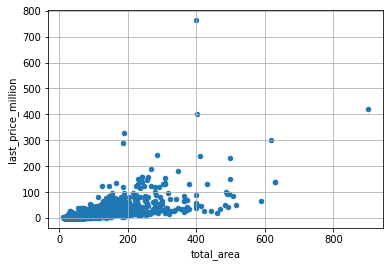

In [55]:
data.plot(x='total_area',y='last_price_million',kind='scatter',grid=True)

Видим, что корреляция положительна, т. к. с ростом общей площади растет цена за квартиру. Квартиры с общей площадью 0-400 метров имеют разброс цены от 0 до 100 млн. руб. Также видим, что чем больше общая площадь квартиры, тем сильней разброс цен.

**Зависит ли цена от жилой площади?**

<AxesSubplot:xlabel='living_area', ylabel='last_price_million'>

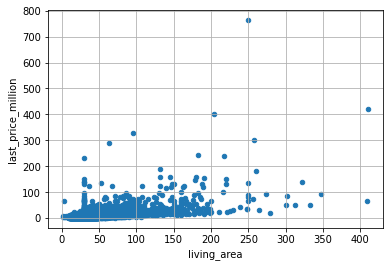

In [56]:
data.plot(x='living_area',y='last_price_million',kind='scatter',grid=True)

Видим аналогичную связь, как в прошлом графике: корреляция положительна, т. к. с ростом жилой площади растет цена за квартиру. Квартиры с жилой площадью 0-200 метров имеют разброс цены от 0 до 100 млн. руб. Также видим, что чем больше общая площадь квартиры, тем сильней разброс цен.

**Зависит ли цена от площади кухни?**

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price_million'>

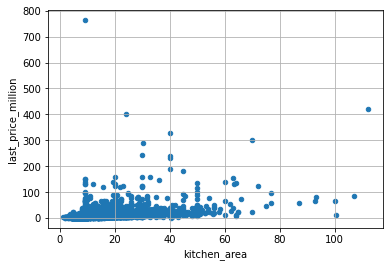

In [57]:
data.plot(x='kitchen_area',y='last_price_million',kind='scatter',grid=True)

Видим аналогичную связь, как в прошлых графиках: корреляция положительна, т. к. с ростом площади кухни растет цена за квартиру. Квартиры с площадью кухни 0-60 метров имеют разброс цены от 0 до 100 млн. руб. Также видим, что чем больше площадь кухни, тем сильней разброс цен.

**Зависит ли цена от количества комнат?**

<AxesSubplot:xlabel='rooms', ylabel='last_price_million'>

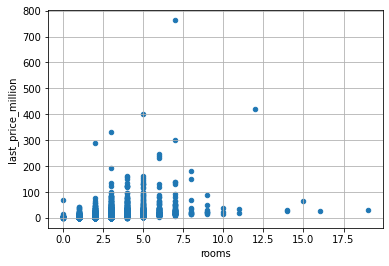

In [58]:
data.plot(x='rooms',y='last_price_million',kind='scatter',grid=True)

По графику видно, что квартиры с 4-6 комнатами имеют наиболее высокую цену - около 180 млн. руб. Самая высокая стоимость квартиры более 700 млн. руб имеет 7 комнат. Самые большое кол-во комнат в квартирах - 12-19 комнат (можно считать за аномалию). В целом мы можем увидеть зависимость роста цены от роста кол-ва комнат, но после 7 комнат тенденция идет на спад.

**Зависит ли цена от типа этажа?**

<AxesSubplot:xlabel='floor_type', ylabel='last_price_million'>

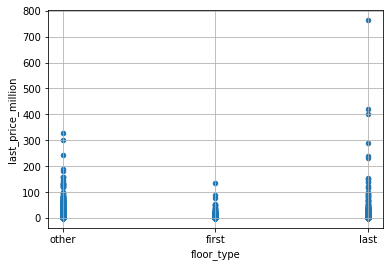

In [59]:
data.plot(x='floor_type',y='last_price_million',kind='scatter',grid=True)

Квартиры, находящиеся на 1 этаже, в среднем стоят дешевле остальных, а квартиры, находящиеся на последних этажах - дороже. Квартира с аномальным значением цены более 700 млн. руб. находится на последнем этаже. Зависимость между типом этажа и ее ценой явно прослеживается.

**Зависит ли цена от даты размещения (день недели, месяц, год)?**

<AxesSubplot:xlabel='weekday', ylabel='last_price_million'>

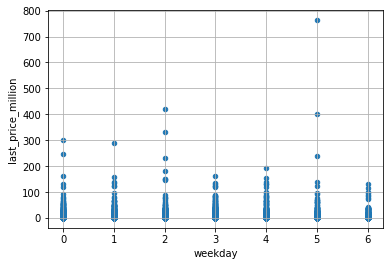

In [60]:
data.plot(x='weekday',y='last_price_million',kind='scatter',grid=True)

Зависимость между ценой квартиры и днем недели размещения объявления не прослеживается. Можно выделить только пару аномально больших значений цен за квартиру, чьи объявления были выставлены в среду (330 и 410 млн. руб.) и в субботу (400 и 770 млн руб.).

<AxesSubplot:xlabel='month', ylabel='last_price_million'>

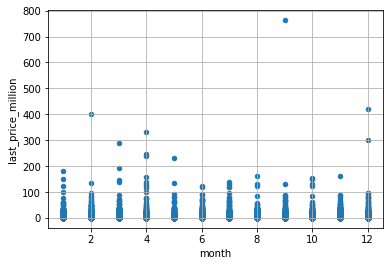

In [61]:
data.plot(x='month',y='last_price_million',kind='scatter',grid=True)

Зависимость между ценой квартиры и месяцем размещения объявления также не прослеживается. Можно выделить только пару аномально больших значений цен за квартиру, чьи объявления были выставлены в феврале (400 млн. руб.), сентябре (770 млн руб.) и в декабре (300 и 410 млн руб.).

<AxesSubplot:xlabel='year', ylabel='last_price_million'>

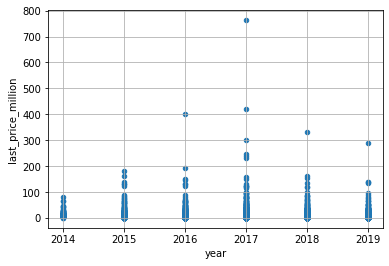

In [62]:
data.plot(x='year',y='last_price_million',kind='scatter',grid=True)

Видим, что самые дешевые объявления были выставлены в 2014-2025 годах. Самые дорогие - в 2016-2017 годах. До 2017 года средняя цена за квартиру шла на возрастание, после - на убывание.

**Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [63]:
#отсортируем столбец и выведем топ 10
data_locality = data['locality_name'].value_counts().head(10).index

In [64]:
#построим сводную таблицу со средними значениями
data_locality_sorted = data.query('locality_name in @data_locality').pivot_table(index='locality_name',values='price_1m',aggfunc='mean')

In [65]:
#отсортируем сводную таблицу по убыванию значений и выведем на экран
data_locality_sorted = data_locality_sorted.sort_values(by='price_1m',ascending=False)
data_locality_sorted

,price_1m
locality_name,
Санкт-Петербург,114849.008794
Пушкин,103125.819291
деревня Кудрово,92473.547576
поселок Парголово,90175.913458
поселок Мурино,85681.762601
поселок Шушары,78677.364217
Колпино,75424.579098
Гатчина,68746.146763
Всеволожск,68654.473986


Самая высокая цена квадратного метра в Санкт-Петербурге - 114 тыс. руб. Далее идут Пушкин и Кудрово со стоимостями 103 и 92 тыс. руб. за 1 кв.м. соответственно. Самая низкая - в Выборге (примерно 58 тыс. руб. за 1 кв. м.)

**Средняя стоимость квартиры на разном удалении от центра**

In [66]:
#построим сводную таблицу со средними значениями
data_locality_spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='citycenters_nearest_km',values='last_price_million',aggfunc='mean')

<AxesSubplot:xlabel='citycenters_nearest_km'>

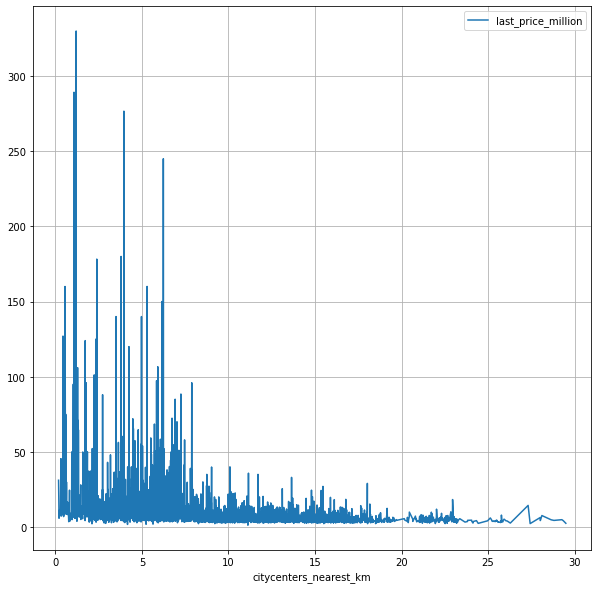

In [67]:
data_locality_spb.plot(figsize=(10,10),grid=True)

Самые дорогие квартиры находятся на расстоянии 0-6 км от центра. Чем дальше от центра расположены квартиры, тем дешевле их цена. Самая дорогая квартира (330 млн. руб.) расположена в 2 км от центра.

## Общий вывод

Цель проекта - установить параметры, влияющие на цену объектов недвижимости В дальнейшем это позволит построить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.
________________

На этапе предобработки данных было выявлено большое кол-во пропущенных значений по 14 из 22 столбцам. По столбцам  'floors_total', 'living_area', 'kitchen_area', 'days_exposition', 'ceiling_height' пропуски заполнялись средним или медианным значением. По столбцу 'is_apartment' пропуски заменились на False, по 'balcony' - на 0, по 'locality_name' - на unknown. Таким образом, мы избавились от пропусков в тех столбцах, где это было возможно и необходимо. В остальных случаях - мы оставили пропуски как есть.

Далее были выявлены 3 столбца 'floors_total', 'balcony', 'days_exposition', в которых был указан неверный тип данных. В конечном итоге тип данных был поменян на целочисленный.

А также мы избавились от неявных дубликатов по столбцу 'locality_name'.


В следующем шаге мы добавили 6 новых столбцов для облегчения дальнейшего исследования: 'price_1m' (цена одного квадратного метра), 'weekday' (день недели публикации объявления), 'month' (месяц публикации объявления), 'year' (год публикации объявления), 'floor_type' (тип этажа квартиры), 'citycenters_nearest_km' (расстояние до центра города в километрах). 
________________

На этапе исследовательского анализа данных мы построили 10 графиков о зависимости таких параметров как: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка.

Мы узнали что:
- в основном общая и жилая площадь продаваемых квартир колеблется между 25 и 50 метрами;
- наиболее часто встречаемая площадь кухни составляет  6-12 метров;
- средняя цена недвижимости - 5 млн. руб.,
- чаще всего на продажу выставляются квартиры с 1-3 комнатами с высотой потолков 3 м.;
- чаще всего квартиры продаются в 3-5 этажных домах;
- большинство продаваемых квартир находятся в 8-20 км от центра города с парками на расстоянии 300-600 м.;
- в среднем объявления были размещены 170 дней с момента публикации до снятия.

Далее мы определяли факторы, которые больше всего влияют на общую стоимость объекта. Выявили, что с ростом общей/жилой площади и площади кухни цена квартиры растет. Кроме того, квартиры, имеющие 4-6 комнат и находящиеся на последнем этаже, дороже. Самые дорогие объявления о продаже квартиры были выставлены в 2016-2017 годах.
________________

Последним шагом было выявление факторов, влияющих на среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самой высокой ценой за 1 кв.м. стал Санкт-Петербург - более 114 тыс. руб. Далее идут Пушкин и Кудрово со стоимостями 103 и 92 тыс. руб. за 1 кв.м. соответственно.

В конце мы определяли среднюю стоимость квартиры на разном удалении ее от центра города в Санкт-Петербурге. Чем ближе квартира находится к центру города - тем выше ее средняя стоимость.